# K-최근접이웃(K-Nearest Neighbors : KNN) 알고리즘
- KNN은 분류나 회귀에 사용되는 비모수 방식
- 특징 공간 내 k개의 가장 가까운 훈련 데이터로 예측
- 근접성은 거리 함수에 의해 측정 : 유클리드 거리, 코사인 유사성, Chebychev distance, Mahalanobis distance, Hamming distance


---

KNN : non-parametric 학습 알고리즘 단계
- 새로운 데이터 x 입력
- KNN 알고리즘은 x와 가까운 k개의 훈련데이터를 찾음
  - KNN 분류 : 다수의 훈련 데이터의 클래스 선택
  - KNN회귀 : 훈련 데이터들의 평균 값 선택
- K개의 최근접 이웃을 구하는 방법 : 거리 계산
  - 유클리디안 거리, 코사인 유사도



---
유클리디안 거리
- 두 지점을 연결하는 거리의 길이를 가장 잘 설명할 수 있는 거리 측정법
- 일반적으로 거리 측정을 사용하기 전 데이터 정규화 수행



---

최대-최소(Min-Max) 정규화
- 최소값을 0, 최대값을 1로 고정한 뒤 모든 값들을 0과 1사이 값으로 변환하는 방법


---
Z-score(표준점수) 정규화
- 평균과 표준편차를 활용해서 정규분포 상에서 평균으로부터 얼마나 떨어져 있는지 Z-score로 변환하는 방법



---

코사인 유사도
- 두 벡터 간 각도의 코사인 값을 이용하여 측정된 벡터 간의 유사한 정도
  - 두 지점 사이의 각도에 따라 -1 ~ 1 사이의 값
  - 각도가 0일 때의 코사인 값은 1, 90의 각을 이룰 경우 0, 180로 완전히 반대 방향인 경우 -1의 값




In [2]:
# x값이 6개고 y값은 알려주지 않았으므로 아래 코드는 비지도 학습이다.
from sklearn.neighbors import NearestNeighbors
import numpy as np


In [3]:
X = np.array([[-1, -1], [-2, -1], [-3, -2], [1, 1], [2, 1], [3, 2]])
nbrs = NearestNeighbors(n_neighbors=2, algorithm='ball_tree').fit(X)
distances, indices = nbrs.kneighbors(X)
print(indices)
print(distances)

[[0 1]
 [1 0]
 [2 1]
 [3 4]
 [4 3]
 [5 4]]
[[0.         1.        ]
 [0.         1.        ]
 [0.         1.41421356]
 [0.         1.        ]
 [0.         1.        ]
 [0.         1.41421356]]


In [4]:
# training points = x, training_labels = y
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=3)
training_poins = [
    [0.5, 0.2, 0.1],
    [0.9, 0.7, 0.3],
    [0.4, 0.5, 0.7]
]
training_labels = [0,1,1]
neigh.fit(training_poins, training_labels)

KNeighborsClassifier(n_neighbors=3)

In [6]:
unknown_points = [
    [0.2, 0.1, 0.7],
    [0.4, 0.7, 0.6],
    [0.5,0.8, 0.1]
]
predictions = neigh.predict(unknown_points)
predictions

array([1, 1, 1])

In [46]:
# KNN 분류 예제실습 : 스페인 프리메라리가 선수들의 지표
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

In [47]:
laliga = pd.read_csv('/content/drive/MyDrive/머신러닝_오유수/laliga_player_stats_english.csv')
laliga.head()

,Team,Position,Shirt number,Name,Minutes played,Games played,Percentage of games played,Full games played,Percentage of full games played,Games started,...,Corners,Tackles.1,Duels,Man-to-man duels,Aerial duels,Passes,Short passes,Long passes,Through balls,Goals scored per attempt
0,Athletic Club,Goalkeeper,NaN,Hodei Oleaga,0.000,0,"0,0%",0,"0,0%",0,...,0,0,0,0,0,0.0,0.0,0,0,0
1,Athletic Club,Goalkeeper,1.0,A. Remiro,0.000,0,"0,0%",0,"0,0%",0,...,0,0,0,0,0,0.0,0.0,0,0,0
2,Athletic Club,Goalkeeper,13.0,Herrerín,2.790,31,"82,0%",31,"82,0%",31,...,0,0,25,6,19,887.0,128.0,759,1,0
3,Athletic Club,Goalkeeper,25.0,Unai Simón,630.000,7,"18,0%",7,"18,0%",7,...,0,0,3,2,1,155.0,49.0,106,0,0
4,Athletic Club,Defender,3.0,Núñez,1.063,12,"32,0%",11,"29,0%",11,...,0,15,107,38,69,536.0,457.0,78,1,0


In [48]:
# 결측값 확인 및 처리
laliga.isnull().sum()

# 결측값 제거
laliga.dropna(inplace=True)

In [49]:
#포지션 변환
laliga['Position'] = laliga['Position'].map({'Goalkeeper': 0, 'Defender': 1, 'Midfielder': 2, 'Forward': 3})

In [50]:
# 특징 변수와 레이블 정의
feature = laliga[['Interceptions', 'Shots']]
position = laliga['Position']

In [51]:
# 학습 데이터와 테스트 데이터로 분할
X_train, X_test, Y_train, Y_test = train_test_split(feature, position, test_size=0.2, random_state=42)

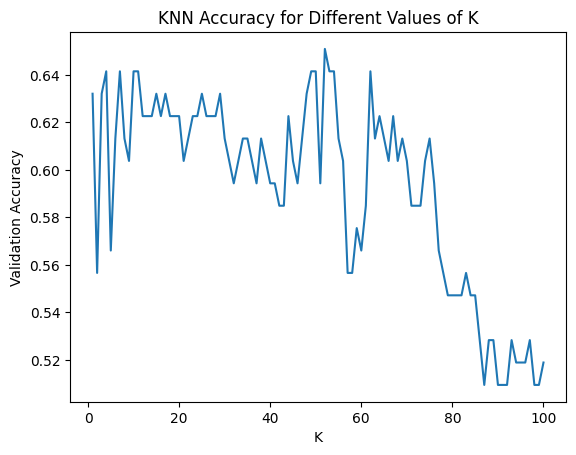

In [59]:
# k값에 따른 정확도 평가
K_list = range(1, 101)
accuracies = []

for k in K_list:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, Y_train)
    accuracies.append(knn.score(X_test, Y_test))

# K 값에 따른 정확도 시각화
plt.plot(K_list, accuracies)
plt.xlabel('K')
plt.ylabel('Validation Accuracy')
plt.title('KNN Accuracy for Different Values of K')
plt.show()

In [60]:
# 최적 k값으로 모델 학습 및 평가
knn = KNeighborsClassifier(n_neighbors=14)
knn.fit(X_train, Y_train)
print(knn.score(X_train, Y_train))
predictions = knn.predict(X_test)
print(knn.score(X_test, Y_test))

0.6571428571428571
0.6226415094339622


In [61]:
# 샘플 예측
sample = np.array([[51, 31],
                   [37, 25],
                   [3,69],
                   [1,10]])
pred = knn.predict(sample)
pred

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


array([2, 2, 3, 3])

In [63]:
# KNN 회귀 예제 실습 : 아이리스 꽃 데이터
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor

In [65]:
data = pd.read_csv('/content/drive/MyDrive/머신러닝_오유수/Iris.csv')
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [66]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [67]:
print(data.shape)

(150, 6)


In [68]:
data['Species'] = data['Species'].map({'Iris-setosa': 0, 'Iris-versicolor': 1, 'Iris-virginica': 2})

In [69]:
x = data[['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']]
y = data['Species']

In [71]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3)

In [72]:
clf = KNeighborsRegressor(n_neighbors=3, weights='distance')
clf.fit(x_train, y_train)
print(clf.score(x_test, y_test))

0.9251859519780822


In [73]:
clf = KNeighborsRegressor(n_neighbors=3, weights='uniform')
clf.fit(x_train, y_train)
print(clf.score(x_test, y_test))

0.9236334405144695


In [74]:
sample = x.sample(100)
sample

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
63,6.1,2.9,4.7,1.4
44,5.1,3.8,1.9,0.4
141,6.9,3.1,5.1,2.3
32,5.2,4.1,1.5,0.1
113,5.7,2.5,5.0,2.0
...,...,...,...,...
114,5.8,2.8,5.1,2.4
125,7.2,3.2,6.0,1.8
86,6.7,3.1,4.7,1.5
134,6.1,2.6,5.6,1.4


In [75]:
pred = clf.predict(sample)
pred

array([1.        , 0.        , 2.        , 0.        , 2.        ,
       1.        , 0.        , 2.        , 1.        , 2.        ,
       0.        , 0.        , 0.        , 2.        , 0.        ,
       1.        , 1.        , 0.        , 1.        , 1.        ,
       2.        , 0.        , 0.        , 1.        , 1.        ,
       1.        , 0.        , 1.        , 2.        , 1.        ,
       1.        , 0.        , 1.        , 0.        , 1.        ,
       2.        , 2.        , 0.        , 1.        , 0.        ,
       2.        , 2.        , 1.        , 2.        , 1.        ,
       0.        , 2.        , 1.        , 1.        , 0.        ,
       2.        , 2.        , 1.33333333, 1.        , 2.        ,
       2.        , 0.        , 2.        , 0.        , 1.        ,
       0.        , 0.        , 0.        , 0.        , 1.33333333,
       0.        , 0.        , 1.        , 2.        , 0.        ,
       1.        , 1.        , 2.        , 0.        , 2.     

# 차원 축소 (Dimensionality Reduction)
- 차원 축소의 중요성
  - 데이터 차원 수가 적으면 학습 시간과 계산해야하는 데이터의 양이 줄어들어 머신러닝 알고리즘의 전체 성능이 향상됨
  - 과적합을 방지
  - 차원의 수를 2~3개 정도로 줄임으로써 데이터 시각화에 유용함



---

- 주성분 분석 (PCA)
  - 데이터에서 주성분 벡터를 찾아 데이터의 차원을 축소하는 방법
  - 입력 데이터의 상관 계수 행렬로 고유벡터들을 찾아서 입력 데이터를 그 벡터들로 투영(projection)시키는 방법

- 선형 판별 분석 (LDA)
  - 다른 클래스에 속하는 데이터들을 선형으로 분류가 가능하도록 데이터 포인터들을 투영시키는 지도학습 방법

- NCA(Neighborhood Components Analysis)
  - 최근접 이웃 분류의 정확도를 높이기 위한 거리 측정 기반의 지도학습방법, 확률적 최근접 이웃 예측 규칙을 사용


In [77]:
# NCA 예제 실습 : 아이리스 꽃 데이터
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import NeighborhoodComponentsAnalysis
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

In [78]:
data = pd.read_csv('/content/drive/MyDrive/머신러닝_오유수/Iris.csv')
print(data.shape)
data.head()

(150, 6)


,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [79]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [80]:
data['Species'] = data['Species'].map({'Iris-setosa': 0, 'Iris-versicolor': 1, 'Iris-virginica': 2})

In [81]:
x = data[['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']]
y = data['Species']

In [83]:
n_neighbors = 3
random_state = 0
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=random_state)

In [84]:
dim = len(x)
n_classes = len(np.unique(y))

In [85]:
pca = make_pipeline(StandardScaler(), PCA(n_components=2, random_state=random_state))
lda = make_pipeline(StandardScaler(), LinearDiscriminantAnalysis(n_components=2))
nca = make_pipeline(StandardScaler(), NeighborhoodComponentsAnalysis(n_components=2, random_state=random_state))

In [86]:
knn = KNeighborsClassifier(n_neighbors=n_neighbors)
dim_reduction_methods = [('PCA', pca), ('LDA', lda), ('NCA', nca)]

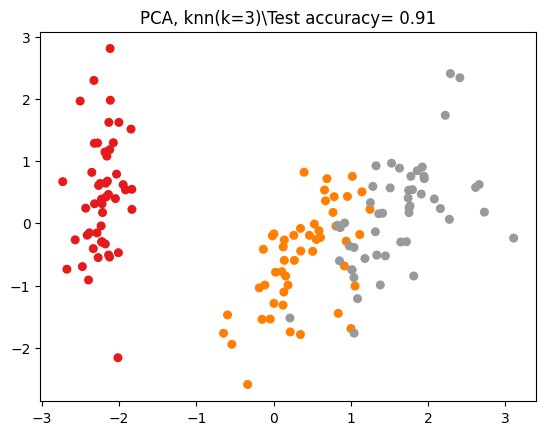

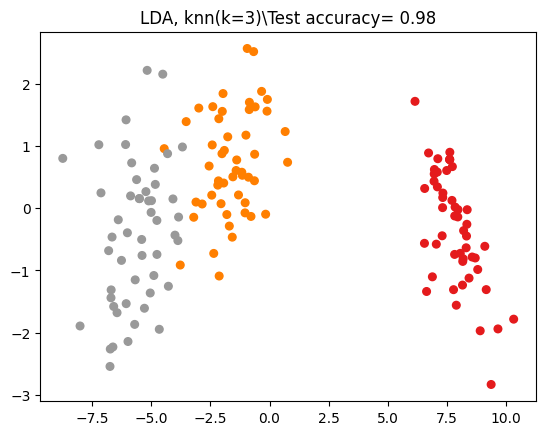

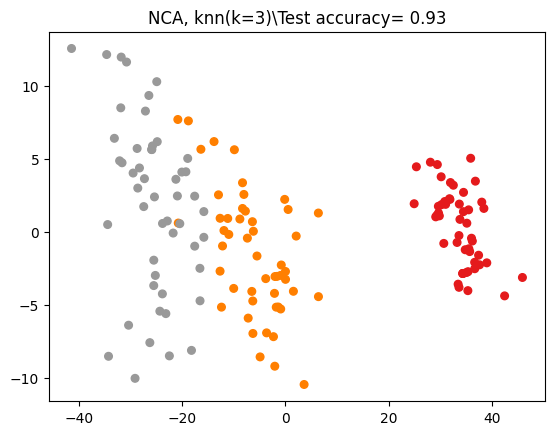

In [88]:
for i, (name, model) in enumerate(dim_reduction_methods):
  plt.figure()
  model.fit(x_train, y_train)
  knn.fit(model.transform(x_train), y_train)
  acc_knn = knn.score(model.transform(x_test), y_test)
  x_embedded = model.transform(x)
  plt.scatter(x_embedded[:, 0], x_embedded[:, 1], c=y, s=30, cmap= 'Set1')
  plt.title('{}, knn(k={})\Test accuracy={: .2f}'.format(name, n_neighbors, acc_knn))
  plt.show()

In [94]:
# 사이킷런의 KNN 예제 실습하기
from sklearn.datasets import load_breast_cancer
breast_cancer_data = load_breast_cancer()

In [95]:
import pandas as pd
df_data = pd.DataFrame(breast_cancer_data.data)
df_labels = pd.DataFrame(breast_cancer_data.target)

In [96]:
print(df_labels.head())
print(breast_cancer_data.target_names)

   0
0  0
1  0
2  0
3  0
4  0
['malignant' 'benign']


In [97]:
df_data.head()

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [98]:
df_data.describe()

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [99]:
def min_max_normalize(lst):
  normalized = []
  for value in lst:
    normalized_num = (value - min(lst)) / (max(lst) - min(lst))
    normalized.append(normalized_num)
  return normalized

In [100]:
for x in range(len(df_data.columns)):
  df_data[x] = min_max_normalize(df_data[x])
df_data.describe()

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,0.338222,0.323965,0.332935,0.216920,0.394785,0.260601,0.208058,0.243137,0.379605,0.270379,...,0.296663,0.363998,0.283138,0.170906,0.404138,0.220212,0.217403,0.393836,0.263307,0.189596
std,0.166787,0.145453,0.167915,0.149274,0.126967,0.161992,0.186785,0.192857,0.138456,0.148702,...,0.171940,0.163813,0.167352,0.139932,0.150779,0.152649,0.166633,0.225884,0.121954,0.118466
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.223342,0.218465,0.216847,0.117413,0.304595,0.139685,0.069260,0.100944,0.282323,0.163016,...,0.180719,0.241471,0.167837,0.081130,0.300007,0.116337,0.091454,0.223127,0.185098,0.107700
50%,0.302381,0.308759,0.293345,0.172895,0.390358,0.224679,0.144189,0.166501,0.369697,0.243892,...,0.250445,0.356876,0.235320,0.123206,0.397081,0.179110,0.181070,0.343402,0.247782,0.163977
75%,0.416442,0.408860,0.416765,0.271135,0.475490,0.340531,0.306232,0.367793,0.453030,0.340354,...,0.386339,0.471748,0.373475,0.220901,0.494156,0.302520,0.305831,0.554639,0.318155,0.242949
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [101]:
from sklearn.model_selection import train_test_split
training_data, validation_data, training_labels, validation_labels = train_test_split(df_data, df_labels, test_size=0.2, random_state=100)

In [102]:
print(len(training_data))
print(len(validation_data))
print(len(training_labels))
print(len(validation_labels))

455
114
455
114


In [103]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=3)
classifier.fit(training_data, training_labels)
print(classifier.score(validation_data, validation_labels))

0.9649122807017544


/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:233: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:233: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:233: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:233: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:233: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for 

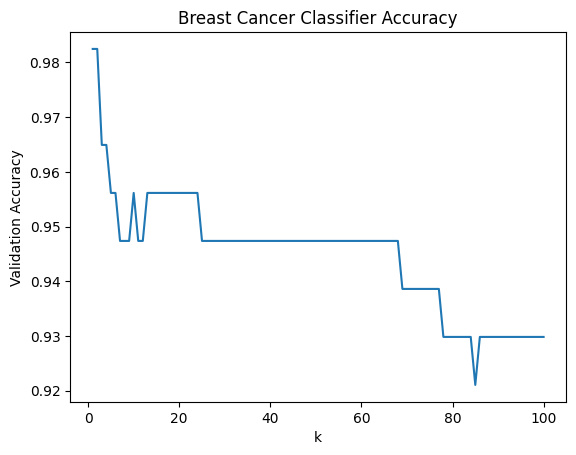

In [104]:
import matplotlib.pyplot as plt

k_list = range(1, 101)
accuracies = []

for k in k_list:
  classifier = KNeighborsClassifier(n_neighbors=k)
  classifier.fit(training_data, training_labels)
  accuracies.append(classifier.score(validation_data, validation_labels))

plt.plot(k_list, accuracies)
plt.xlabel('k')
plt.ylabel('Validation Accuracy')
plt.title('Breast Cancer Classifier Accuracy')
plt.show()

In [105]:
for k in range(5):
  classifier = KNeighborsClassifier(n_neighbors=k+1)
  classifier.fit(training_data, training_labels)
  print(classifier.score(validation_data, validation_labels))

0.9824561403508771
0.9824561403508771
0.9649122807017544
0.9649122807017544
0.956140350877193


/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:233: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:233: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:233: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:233: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for 